In [1]:
# Import necessary libraries
import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation and analysis
from matplotlib import pyplot as plt  # Plotting
import seaborn as sns  # Data visualization
from sklearn.impute import SimpleImputer  # Imputing missing values
from sklearn.preprocessing import MinMaxScaler  # Scaling features
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and cross-validation
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.tree import DecisionTreeRegressor  # Decision tree regressor
from sklearn.ensemble import RandomForestRegressor  # Random forest regressor
from sklearn.svm import SVR  # Support Vector Regressor
from sklearn.neural_network import MLPRegressor  # Multi-layer Perceptron Regressor
from sklearn.metrics import mean_squared_error  # Mean squared error

In [2]:
# Read supply data from the "supply.csv" file into a pandas DataFrame
supply_data = pd.read_csv("supply.csv")

# Read demand data from the "demand.csv" file into a pandas DataFrame
demand_data = pd.read_csv("demand.csv")

In [3]:
supply_data.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895


Supply File:

DATE: The date of the observation. (2003 - 2023)
    
PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate). This variable represents the number of new housing units authorized for construction in permit-issuing places.
        
MSACSR: Monthly Supply of New Houses in the United States (Seasonally Adjusted). It indicates the monthly supply of new houses available in the United States.
    
TLRESCONS: Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate). This variable represents the total construction spending on residential projects.
        
EVACANTUSQ176N: Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted). It provides an estimate of the number of vacant housing units in the United States.
        
CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted). This variable serves as a proxy for home prices and represents the home price index for the United States.

In [4]:
demand_data.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


Demand File:

INTDSRUSM193N: Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate). This variable represents the interest rates or discount rates for the United States.

UMCSENT: University of Michigan: Consumer Sentiment. It measures the consumer sentiment index based on surveys conducted by the University of Michigan.

GDP: Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate).

MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted). It indicates the average interest rate for a 30-year fixed-rate mortgage.

MSPUS: Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)

CSUSHPISA: S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted). This variable serves as a proxy for home prices and represents the home price index for the United States.

In [5]:
# Convert the 'DATE' column in the supply_data DataFrame to datetime format
supply_data['DATE'] = pd.to_datetime(supply_data['DATE'])

# Convert the 'DATE' column in the demand_data DataFrame to datetime format
demand_data['DATE'] = pd.to_datetime(demand_data['DATE'])

# Sort the supply_data DataFrame based on the 'DATE' column
supply_data = supply_data.sort_values('DATE')

# Sort the demand_data DataFrame based on the 'DATE' column
demand_data = demand_data.sort_values('DATE')

# Merge the supply_data and demand_data DataFrames on the 'DATE' column with suffixes
# '_supply' and '_demand' to distinguish columns with the same names
merged_data = pd.merge(supply_data, demand_data, on='DATE', suffixes=('_supply', '_demand'))

# Display the first few rows of the merged_data DataFrame
merged_data.head()


,DATE,CSUSHPISA_supply,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_demand,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [6]:
# Check for missing values in the merged_data DataFrame and sum them up column-wise
missing_values = merged_data.isnull().sum()
missing_values
# The 'missing_values' variable now contains the count of missing values for each column

DATE                0
CSUSHPISA_supply    0
MSACSR              0
PERMIT              0
TLRESCONS           0
EVACANTUSQ176N      0
CSUSHPISA_demand    1
MORTGAGE30US        0
UMCSENT             0
INTDSRUSM193N       7
MSPUS               0
GDP                 0
dtype: int64

In [7]:
# Create a SimpleImputer object with the strategy of filling missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fill missing values in the 'INTDSRUSM193N' column of the merged_data DataFrame with the mean
merged_data['INTDSRUSM193N'] = imputer.fit_transform(merged_data[['INTDSRUSM193N']])

# Rename the 'CSUSHPISA_demand' column to 'CSUSHPISA' in the merged_data DataFrame
merged_data.rename(columns={'CSUSHPISA_demand': 'CSUSHPISA'}, inplace=True)

# Fill missing values in the 'CSUSHPISA' column with the mean of the column
merged_data['CSUSHPISA'] = merged_data['CSUSHPISA'].fillna(merged_data['CSUSHPISA'].mean())

# Reset the index of the merged_data DataFrame
merged_data = merged_data.reset_index(drop=True)

In [8]:
merged_data.head()

,DATE,CSUSHPISA_supply,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


# Exploratory Data Analysis

## Correlation Matrix

In [9]:
# Calculate the correlation between the 'CSUSHPISA' column and all other columns in the merged_data DataFrame
correlation = merged_data.corr()['CSUSHPISA']

# Create a DataFrame to store the correlation values and reset the index
correlation_table = pd.DataFrame(correlation).reset_index()

# Rename the columns in the correlation_table DataFrame for clarity
correlation_table.columns = ['Factors', 'Correlation with CSUSHPISA']

# Print the correlation table
print(correlation_table)

         Factors  Correlation with CSUSHPISA
0      CSUSHPISA                    1.000000
1   MORTGAGE30US                   -0.215379
2        UMCSENT                   -0.096213
3  INTDSRUSM193N                    0.102608
4          MSPUS                    0.907924
5            GDP                    0.823877



- **MORTGAGE30US (30-Year Fixed Rate Mortgage Average)**: Weak negative correlation (-0.22) - Higher mortgage rates might slightly lower home prices.
- **UMCSENT (University of Michigan: Consumer Sentiment)**: Weak negative correlation (-0.10) - Lower consumer sentiment might slightly decrease home prices.
- **INTDSRUSM193N (Interest Rates, Discount Rate)**: Weak positive correlation (0.10) - Higher interest rates could lead to slightly higher home prices.
- **MSPUS (Median Sales Price of Houses Sold)**: Strong positive correlation (0.91) - Higher median sales prices strongly linked to higher home prices.
- **GDP (Gross Domestic Product)**: Strong positive correlation (0.82) - Higher GDP strongly associated with higher home prices.

In [10]:
# Convert the 'DATE' column in the merged_data DataFrame to datetime format
merged_data['DATE'] = pd.to_datetime(merged_data['DATE'])

# Set the 'DATE' column as the index of the merged_data DataFrame
merged_data.set_index('DATE', inplace=True)

# Convert specific columns to numeric, coercing errors to NaN
merged_data['MSACSR'] = pd.to_numeric(merged_data['MSACSR'], errors='coerce')
merged_data['PERMIT'] = pd.to_numeric(merged_data['PERMIT'], errors='coerce')
merged_data['TLRESCONS'] = pd.to_numeric(merged_data['TLRESCONS'], errors='coerce')
merged_data['EVACANTUSQ176N'] = pd.to_numeric(merged_data['EVACANTUSQ176N'], errors='coerce')

In [11]:
merged_data.head()

,CSUSHPISA_supply,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
DATE,,,,,,,,,,,
2003-01-01,129.321,4.200000,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
2003-01-04,131.756,3.833333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2003-01-07,135.013,3.633333,1937.333333,458890.0000,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
2003-01-10,138.8356667,3.966667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
2004-01-01,143.2986667,3.700000,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


# Visualization Analysis:

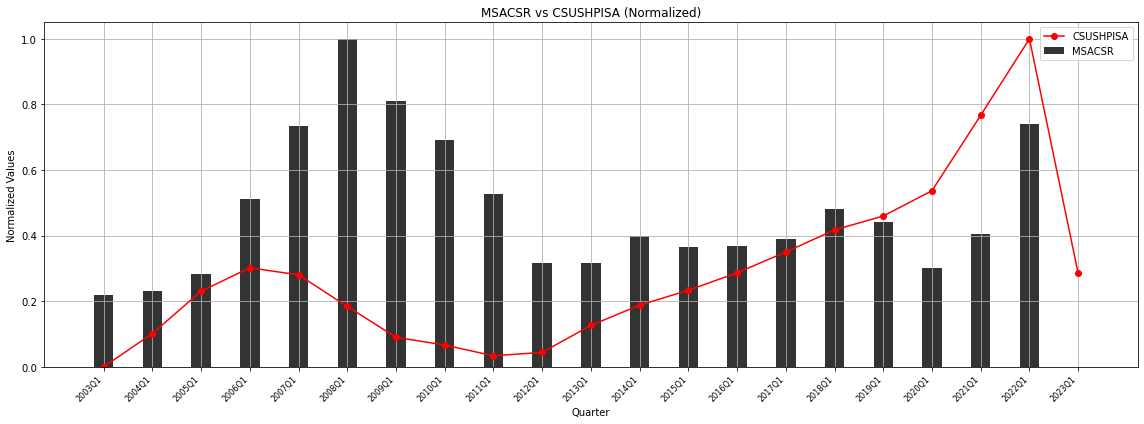

In [12]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by 'QUARTER' and aggregate sum for 'MSACSR' and mean for 'CSUSHPISA'
grouped_data = merged_data.groupby('QUARTER').agg({'MSACSR': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Scale the 'MSACSR' and 'CSUSHPISA' columns using MinMaxScaler
scaler = MinMaxScaler()
grouped_data[['MSACSR', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MSACSR', 'CSUSHPISA']])

# Sort the grouped_data DataFrame by 'QUARTER'
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart and line plot to visualize 'MSACSR' and 'CSUSHPISA' over quarters
plt.figure(figsize=(16, 6))
bar_width = 0.4
opacity = 0.8

# Create a bar plot for 'MSACSR'
plt.bar(grouped_data['QUARTER'], grouped_data['MSACSR'], width=bar_width, alpha=opacity, color='black', label='MSACSR')

# Create a line plot for 'CSUSHPISA'
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('MSACSR vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Display grid and adjust x-axis labels
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure a tight layout and show the plot
plt.tight_layout()
plt.show()


Monthly Supply of New Houses (MSACSR): Reflects new home inventory vs. sales rate.

Higher MSACSR indicates longer time for existing inventory to sell.

Negative correlation with home prices (CSUSHPISA).

Increased MSACSR linked to decreased S&P/Case-Shiller U.S. National Home Price Index.

Higher new home supply may reduce demand and lead to price declines.

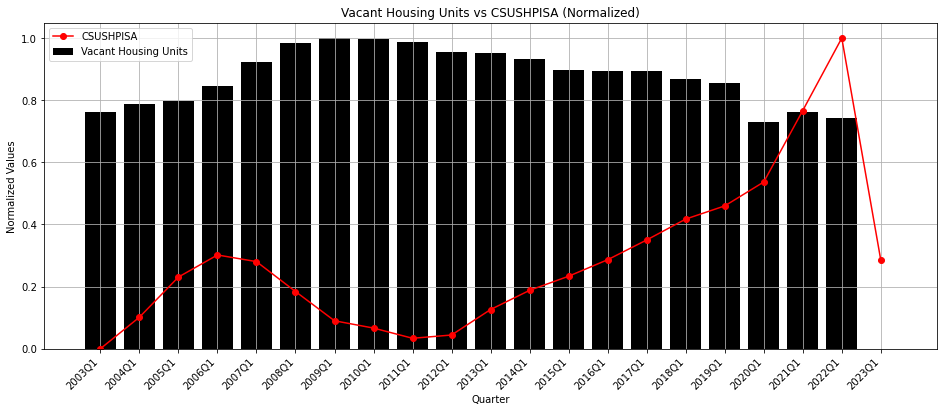

In [13]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'EVACANTUSQ176N' and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'EVACANTUSQ176N': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['EVACANTUSQ176N', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['EVACANTUSQ176N', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'EVACANTUSQ176N' and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))

plt.bar(grouped_data['QUARTER'], grouped_data['EVACANTUSQ176N'], color='black',label='Vacant Housing Units')
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('Vacant Housing Units vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Display grid and adjust x-axis labels
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

Vacant Housing Units Estimate: Impacts S&P/Case-Shiller U.S. National Home Price Index.

Low housing inventory can drive prices up and lead to bidding wars.

High demand for limited properties results in competitive higher offers.

Increase in vacant housing units may exert downward pressure on property values.

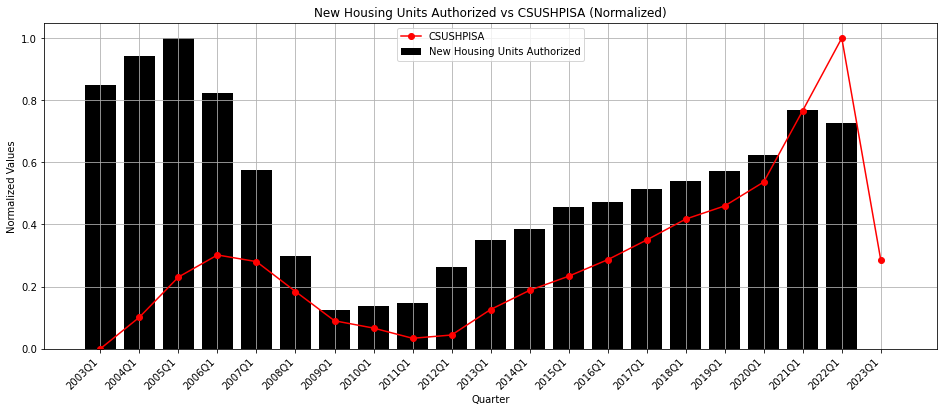

In [14]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'PERMIT' and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'PERMIT': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['PERMIT', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['PERMIT', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'PERMIT' and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))

plt.bar(grouped_data['QUARTER'], grouped_data['PERMIT'],color='black', label='New Housing Units Authorized')
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('New Housing Units Authorized vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Display grid and adjust x-axis labels
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


New Privately-Owned Housing Units Authorized (PERMIT): Measures authorized new housing units via building permits.

Used to assess housing market strength and overall economy.

Residential building permits reflect consumer confidence and solvency.

Moderate positive correlation with home prices (CSUSHPISA).

More authorized housing units tend to elevate home prices.

Reduced supply of homes, workers, and materials can lead to price increases.

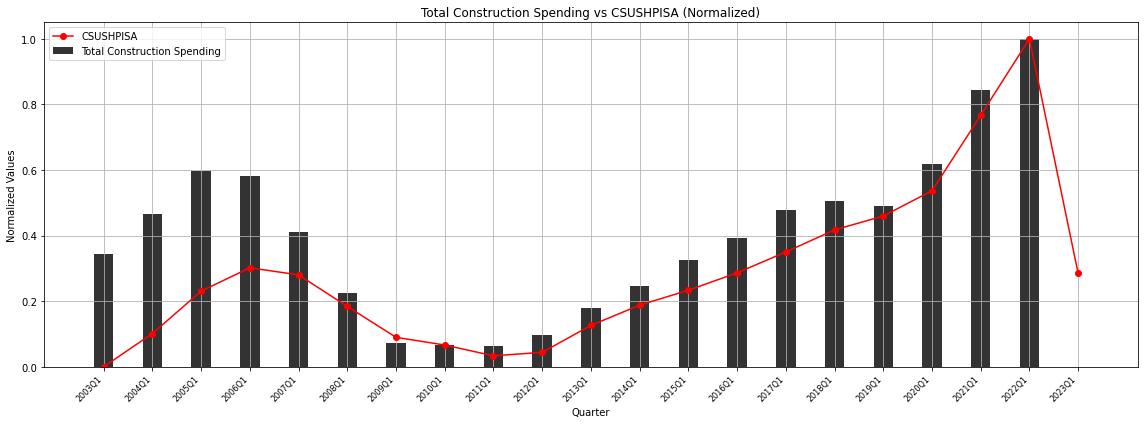

In [15]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'TLRESCONS' and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'TLRESCONS': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['TLRESCONS', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['TLRESCONS', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'TLRESCONS' and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for TLRESCONS (Total Construction Spending)
plt.bar(grouped_data['QUARTER'], grouped_data['TLRESCONS'], width=bar_width, alpha=opacity, color='black', label='Total Construction Spending')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('Total Construction Spending vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Add gridlines, rotate and align x-axis tick labels for better readability
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure all elements fit into the figure area
plt.tight_layout()
plt.show()

Total Construction Spending: Residential: Reflects spending on residential projects.

Residential construction spending is around 50% of total U.S. construction spending.

Tracks new home construction, linked to consumer job and economic optimism.

Strong positive correlation with home prices (CSUSHPISA).

Higher spending on residential projects tends to drive home prices higher.

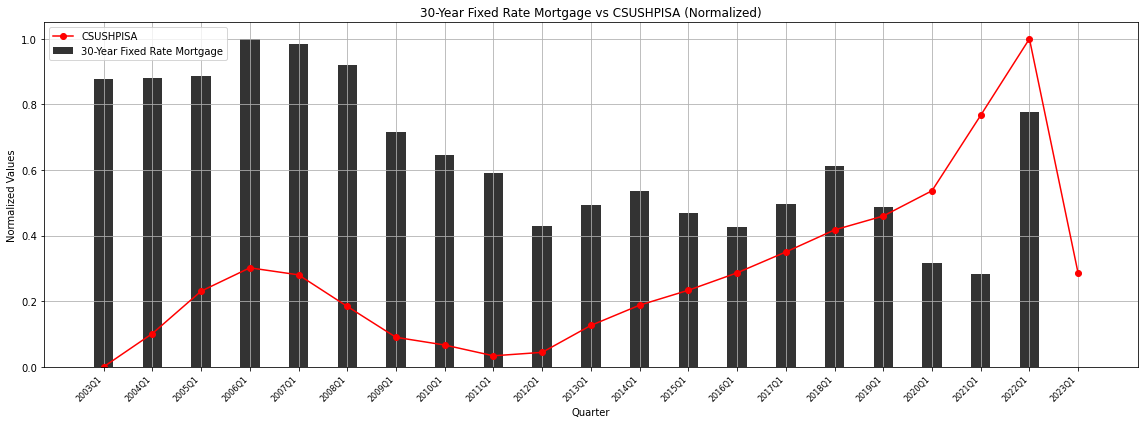

In [16]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'MORTGAGE30US' and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'MORTGAGE30US': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['MORTGAGE30US', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MORTGAGE30US', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'MORTGAGE30US' and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for MORTGAGE30US (30-Year Fixed Rate Mortgage)
plt.bar(grouped_data['QUARTER'], grouped_data['MORTGAGE30US'], width=bar_width, alpha=opacity, color='black', label='30-Year Fixed Rate Mortgage')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('30-Year Fixed Rate Mortgage vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Add gridlines, rotate and align x-axis tick labels for better readability
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure all elements fit into the figure area
plt.tight_layout()
plt.show()

30-Year Fixed Rate Mortgage Average: Tracks average interest rate on 30-year fixed mortgages in the U.S.

Low mortgage rates can boost home buying, increasing demand and raising prices.

High mortgage rates can hinder home buying, reducing demand and lowering prices.


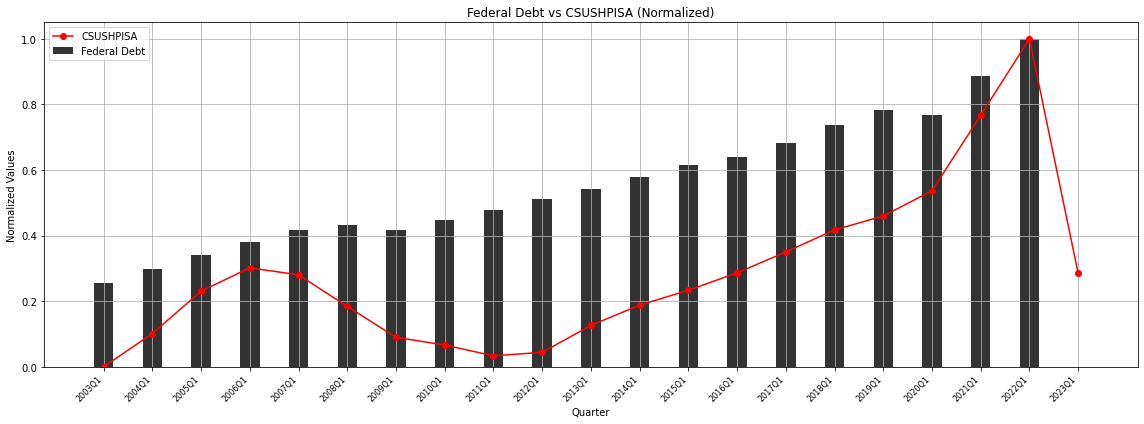

In [17]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'GDP' (Federal Debt) and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'GDP': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['GDP', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['GDP', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'GDP' (Federal Debt) and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for GDP (Federal Debt)
plt.bar(grouped_data['QUARTER'], grouped_data['GDP'], width=bar_width, alpha=opacity, color='black', label='Federal Debt')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('Federal Debt vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Add gridlines, rotate and align x-axis tick labels for better readability
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure all elements fit into the figure area
plt.tight_layout()
plt.show()

Gross Domestic Product (GDP): Measures total value of U.S. goods and services, including exports.

GDP rises when domestic sales to foreign countries exceed foreign purchases.

Trade surplus indicates increased GDP.

Housing market and economy are interconnected.

Rising real estate prices boost homeowner confidence and spending.

More housing development activity contributes to higher GDP.

Higher GDP typically corresponds to higher home prices.

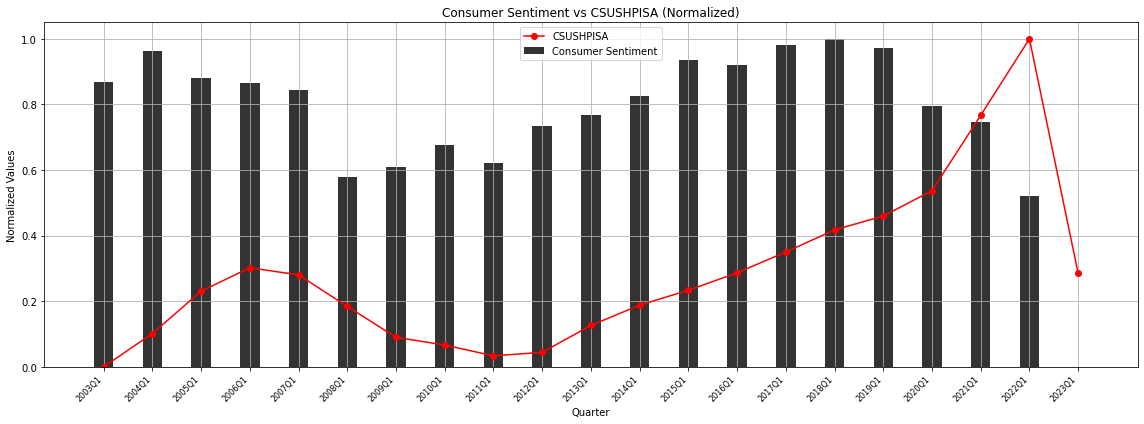

In [18]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'UMCSENT' (Consumer Sentiment) and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'UMCSENT': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['UMCSENT', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['UMCSENT', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'UMCSENT' (Consumer Sentiment) and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for UMCSENT (Consumer Sentiment)
plt.bar(grouped_data['QUARTER'], grouped_data['UMCSENT'], width=bar_width, alpha=opacity, color='black', label='Consumer Sentiment')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('Consumer Sentiment vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Add gridlines, rotate and align x-axis tick labels for better readability
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure all elements fit into the figure area
plt.tight_layout()
plt.show()

University of Michigan Consumer Sentiment Index: Rates current and future economic conditions.

Monthly survey of U.S. consumer confidence by the University of Michigan.

Affects U.S. National Home Price Index.

Measures consumer confidence impacting spending and saving.

Higher consumer confidence can lead to increased spending on homes.

Increased home demand due to confidence can raise home prices.

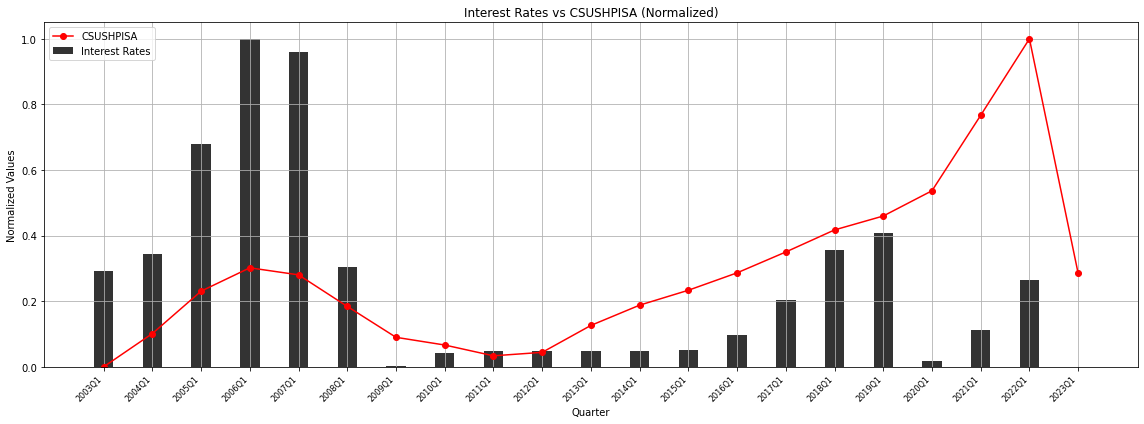

In [19]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'INTDSRUSM193N' (Interest Rates) and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'INTDSRUSM193N': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['INTDSRUSM193N', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['INTDSRUSM193N', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'INTDSRUSM193N' (Interest Rates) and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for INTDSRUSM193N (Interest Rates)
plt.bar(grouped_data['QUARTER'], grouped_data['INTDSRUSM193N'], width=bar_width, alpha=opacity, color='black', label='Interest Rates')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('Interest Rates vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Add gridlines, rotate and align x-axis tick labels for better readability
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure all elements fit into the figure area
plt.tight_layout()
plt.show()

Interest Rates and Discount Rate: Federal Reserve tools to impact money and credit supply.

Fed actions with securities affect reserves in banks.

Interest rates influence housing costs.

Lower rates make borrowing for homes easier.

Increased demand due to lower rates can elevate home prices.

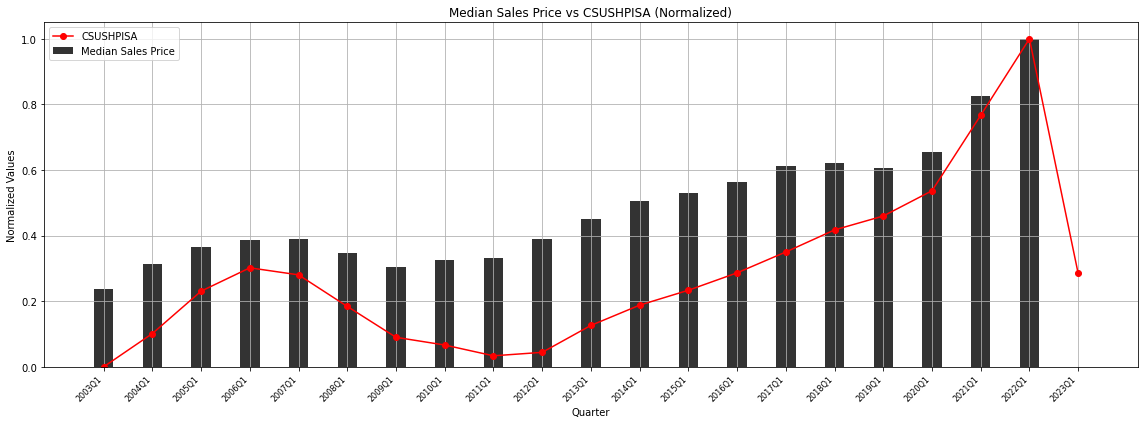

In [20]:
# Create a new 'QUARTER' column by converting the index to quarters
merged_data['QUARTER'] = merged_data.index.to_period('Q')

# Convert the 'QUARTER' column to string format for plotting
merged_data['QUARTER'] = merged_data['QUARTER'].astype(str)

# Group the data by quarter and calculate the sum of 'MSPUS' (Median Sales Price) and the average of 'CSUSHPISA' for each quarter
grouped_data = merged_data.groupby('QUARTER').agg({'MSPUS': 'sum', 'CSUSHPISA': 'mean'}).reset_index()

# Normalize the data using min-max scaling
scaler = MinMaxScaler()
grouped_data[['MSPUS', 'CSUSHPISA']] = scaler.fit_transform(grouped_data[['MSPUS', 'CSUSHPISA']])

# Sort the data by quarter
grouped_data = grouped_data.sort_values('QUARTER')

# Create a bar chart for 'MSPUS' (Median Sales Price) and a line plot for 'CSUSHPISA'
plt.figure(figsize=(16, 6))  # Adjust the figure size as per your preference

bar_width = 0.4
opacity = 0.8

# Bar chart for MSPUS (Median Sales Price)
plt.bar(grouped_data['QUARTER'], grouped_data['MSPUS'], width=bar_width, alpha=opacity, color='black', label='Median Sales Price')

# Line plot for CSUSHPISA
plt.plot(grouped_data['QUARTER'], grouped_data['CSUSHPISA'], marker='o', linestyle='-', color='red', label='CSUSHPISA')

# Set plot title, labels, and legend
plt.title('Median Sales Price vs CSUSHPISA (Normalized)')
plt.xlabel('Quarter')
plt.ylabel('Normalized Values')
plt.legend()

# Add gridlines, rotate and align x-axis tick labels for better readability
plt.grid(True)
plt.xticks(rotation=45, ha='right', fontsize=8)

# Ensure all elements fit into the figure area
plt.tight_layout()
plt.show()

Median Sales Price of Houses Sold: Median sale price for homes in the U.S.

Represents midpoint between higher and lower sale prices.

Strong positive correlation with higher home prices.

Elevated median sales prices linked to higher overall home prices.

# Model Building

In [21]:
# Define the features and target variable
features = ['MSACSR', 'PERMIT', 'TLRESCONS', 'EVACANTUSQ176N', 'MORTGAGE30US', 'GDP', 'UMCSENT', 'INTDSRUSM193N', 'MSPUS']
target = 'CSUSHPISA'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged_data[features], merged_data[target], test_size=0.2, random_state=42)

# Define a dictionary of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

# Initialize a dictionary to store the mean squared error (MSE) results
results = {}

# Perform cross-validation and calculate MSE for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    results[model_name] = avg_mse

# Find the best model based on the lowest average MSE
best_model = min(results, key=results.get)
best_model_instance = models[best_model]

# Train the best model on the training data
best_model_instance.fit(X_train, y_train)

# Make predictions on the testing data
predictions = best_model_instance.predict(X_test)

# Calculate MSE for the best model on the testing data
mse = mean_squared_error(y_test, predictions)

# Print the model selection results and the best model's performance
print("Model Selection Results:")
for model, mse_score in results.items():
    print(f"{model}: MSE={mse_score}")

print(f"\nBest Model: {best_model}")
print(f"Best Model MSE on Testing Set: {mse}")

Model Selection Results:
Linear Regression: MSE=292.542283789052
Decision Tree: MSE=799.4705045769613
Random Forest: MSE=314.800277410239
Support Vector Regression: MSE=1566.053809355138
Neural Network: MSE=64934964.05724522

Best Model: Linear Regression
Best Model MSE on Testing Set: 33.17963482498392


/home/dell/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
from sklearn.metrics import r2_score

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, predictions)

# Print the R2 score
print("R-squared score:", r2)

R-squared score: 0.9723281532455864


In [23]:
# Fit the best model to the training data
best_model_instance.fit(X_train, y_train)

# Get the coefficients from the best model
coefficients = best_model_instance.coef_

# Print the coefficients for each feature
print("Coefficients:")
for feature, coefficient in zip(features, coefficients):
    print(f"{feature}: {coefficient}")


Coefficients:
MSACSR: 8.17930639611564
PERMIT: 0.019751930454274053
TLRESCONS: 5.693157163689767e-05
EVACANTUSQ176N: -0.0013309828088830954
MORTGAGE30US: -14.99493573227329
GDP: -0.003034615996582702
UMCSENT: -0.18699748490154033
INTDSRUSM193N: 3.9720304013682424
MSPUS: 0.0004559303955056806


# Model Evaluation:

**Model Evaluation Metrics:**

- Evaluated using Mean Squared Error (MSE) and R-squared score.
- MSE measures average squared difference between actual and predicted values.
- Lower MSE indicates better performance and smaller prediction errors.
- R-squared score measures explained variance, higher values indicate better fit.
- Linear Regression model performed well with MSE of 33.18 and R-squared score of 0.9723.

**Key Observations from Coefficients:**

- 'PERMIT' (authorized new housing units) had small positive coefficient (0.0197).
- 'MSACSR' (monthly supply of new houses) had positive coefficient (8.17).
- 'TLRESCONS' (construction spending on residential projects) had positive coefficient (5.693).
- 'EVACANTUSQ176N' (estimated vacant housing units) had negative coefficient (-0.00133).
- 'MORTGAGE30US' (30-year fixed-rate mortgage) had negative coefficient (-14.994).
- 'GDP' (Gross Domestic Product) had very small negative coefficient (-0.00303).
- 'UMCSENT' (consumer sentiment index) had negative coefficient (-0.18699).
- 'INTDSRUSM193N' (interest or discount rates) had positive coefficient (3.97).
- 'MSPUS' (median sales price) had small positive coefficient (0.000455).

**Interpretation:**

- Coefficients show direction and magnitude of feature relationships.
- Identify features' impact on predicted home price index.
- Linear Regression model performed well, explaining variance and predicting home prices effectively.

# Interpretation and Insights:

**Supply Factors:**

- **CSUSHPISA (Home Price Index) vs. MSACSR (Monthly Supply of New Homes):**
  - Very weak positive association.
  - Conclusion is negative due to weak correlation.
  - Implies increased supply of new homes could slightly lower housing prices.

- **PERMIT (Authorized Housing Units) vs. Home Values:**
  - Moderately positive correlation.
  - More authorized housing units linked to higher property prices.
  - Increased authorizations impact supply of houses, materials, and labor.

- **TLRESCONS (Construction Spending) vs. Home Prices:**
  - Strong positive correlation.
  - Higher construction spending linked to higher home prices.
  - Construction costs contribute to overall house price increase.

- **EVACANTUSQ176N (Vacant Housing Units) vs. Home Prices:**
  - Moderate negative correlation.
  - More vacant units can lower home prices.
  - Increased housing supply leads to price decrease.

**Demand Factors:**

- **MORTGAGE30US (30-Year Mortgage Rate) vs. Home Prices:**
  - Weak negative correlation.
  - Higher mortgage rates associated with slightly lower home prices.
  - Rising rates can reduce home buying demand and lower prices.

- **UMCSENT (Consumer Sentiment) vs. Home Prices:**
  - Weak negative correlation.
  - Lower consumer sentiment linked to slightly lower home prices.
  - Confident consumers more likely to buy homes, driving up prices.

- **INTDSRUSM193N (Interest/Discount Rates) vs. Home Prices:**
  - Weak positive association due to scaling issue.
  - Interest rates negatively correlated with home prices.
  - Higher rates can lead to lower home prices.

- **GDP (Gross Domestic Product) vs. Home Prices:**
  - Strong positive correlation.
  - Higher GDP linked to higher home prices.

- **MSPUS (Median Sales Price) vs. Home Prices:**
  - Strong positive correlation.
  - Higher median sales prices strongly linked to higher home prices.

# Conclusion:

**Supply Factors:**

- House inventory and authorized housing units have positive impact on home prices.
- Higher construction spending on residential projects leads to higher home prices.

**Demand Factors:**

- Mortgage interest rates negatively affect home prices.
- Lower consumer sentiment correlates with slightly lower home prices.

**Economic Factors:**

- GDP and interest rates play crucial roles in determining home prices.
- Strong economy with higher GDP supports higher home prices.

**Market Dynamics:**

- Median sales price strongly correlated with home prices.
- Reflects significance of market dynamics and buyer behavior.
